<a href="https://colab.research.google.com/github/kaifshaheemj/Electronic-Sales-Prediction-/blob/main/DAV_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
upload = files.upload()

Saving sales_forecasting.csv to sales_forecasting.csv


In [ ]:
import pandas as pd 
data = pd.read_csv("sales_forecasting.csv")
data

,Unnamed: 0,Order_IDS,Products,Quantities_Ordered,Price_Of_Each,Ordered_Date,Time,Purchase_Address
0,0,173720,Wired Headphones,1,11.99,03/16/19,03:26,"191 Adams St, Seattle, WA 98101"
1,1,168273,Wired Headphones,2,11.99,03/15/19,08:29,"901 12th St, Atlanta, GA 30301"
2,2,166136,Macbook Pro Laptop,1,1700.00,03/18/19,18:44,"623 South St, Boston, MA 02215"
3,3,166513,AA Batteries (4-pack),1,3.84,03/07/19,23:37,"266 Ridge St, New York City, NY 10001"
4,4,165568,Apple Airpods Headphones,1,150.00,03/05/19,11:01,"736 Maple St, Dallas, TX 75001"
...,...,...,...,...,...,...,...,...
3974,4037,215382,Lightning Charging Cable,1,14.95,06/14/19,11:54,"116 Washington St, Los Angeles, CA 90001"
3975,4038,217789,Bose SoundSport Headphones,1,99.99,06/27/19,00:08,"25 Pine St, Boston, MA 02215"
3976,4039,213724,USB-C Charging Cable,1,11.95,06/20/19,05:55,"880 2nd St, Dallas, TX 75001"
3977,4040,216734,AA Batteries (4-pack),1,3.84,06/18/19,21:22,"70 5th St, San Francisco, CA 94016"


In [ ]:
data.isnull().sum()

Unnamed: 0            0
Order_IDS             0
Products              0
Quantities_Ordered    0
Price_Of_Each         0
Ordered_Date          0
Time                  0
Purchase_Address      0
dtype: int64

In [ ]:
data.dtypes

Unnamed: 0              int64
Order_IDS               int64
Products               object
Quantities_Ordered      int64
Price_Of_Each         float64
Ordered_Date           object
Time                   object
Purchase_Address       object
dtype: object

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.0/592.0 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 KB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 KB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8

In [ ]:
pip install darts

In [ ]:
data.dtypes

Unnamed: 0              int64
Order_IDS               int64
Products               object
Quantities_Ordered      int64
Price_Of_Each         float64
Ordered_Date           object
Time                   object
Purchase_Address       object
dtype: object

In [ ]:
data['Ordered_Date'] = pd.to_datetime(data['Ordered_Date'])

In [ ]:
data.dtypes

Unnamed: 0                     int64
Order_IDS                      int64
Products                      object
Quantities_Ordered             int64
Price_Of_Each                float64
Ordered_Date          datetime64[ns]
Time                          object
Purchase_Address              object
dtype: object

In [ ]:
data.set_index('Ordered_Date',inplace = True)

In [ ]:
data.head()

,Unnamed: 0,Order_IDS,Products,Quantities_Ordered,Price_Of_Each,Time,Purchase_Address
Ordered_Date,,,,,,,
2019-03-16,0,173720,Wired Headphones,1,11.99,03:26,"191 Adams St, Seattle, WA 98101"
2019-03-15,1,168273,Wired Headphones,2,11.99,08:29,"901 12th St, Atlanta, GA 30301"
2019-03-18,2,166136,Macbook Pro Laptop,1,1700.00,18:44,"623 South St, Boston, MA 02215"
2019-03-07,3,166513,AA Batteries (4-pack),1,3.84,23:37,"266 Ridge St, New York City, NY 10001"
2019-03-05,4,165568,Apple Airpods Headphones,1,150.00,11:01,"736 Maple St, Dallas, TX 75001"


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df = data.sample(1000)

<AxesSubplot:xlabel='Ordered_Date'>

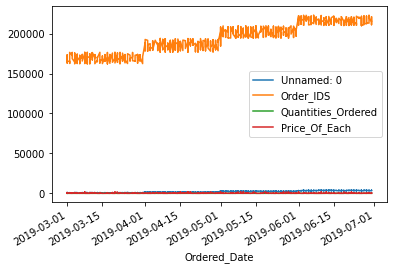

In [ ]:
df.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(sales):
    result= adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['Price_Of_Each']*df['Quantities_Ordered'])

ADF Test Statistic : -32.03389638701957
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 999
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
We Are going to accept the Null Hypothesis 

In [ ]:
df.dtypes

Unnamed: 0              int64
Order_IDS               int64
Products               object
Quantities_Ordered      int64
Price_Of_Each         float64
Time                   object
Purchase_Address       object
dtype: object

In [ ]:
df.shape

(1000, 7)

TypeError: ignored

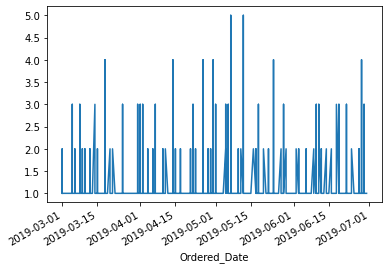

In [ ]:
df['Price_Of_Each']*df['Quantities_Ordered'].plot()

In [ ]:
from darts import TimeSeries


In [ ]:
data['Products'] = data['Products'].astype(str)
data['Products'].dtypet

In [ ]:
data['Products'] = data['Products'].astype('|S')

In [ ]:
data['Products'].dtype

dtype('S26')

In [ ]:
data.dtypes

Unnamed: 0              int64
Order_IDS               int64
Products                 |S26
Quantities_Ordered      int64
Price_Of_Each         float64
Ordered_Date           object
Time                   object
Purchase_Address       object
dtype: object

In [ ]:
data['Ordered_Date'] = data['Ordered_Date'].astype(str)

In [ ]:
data['Ordered_Date'] = data['Ordered_Date'].astype('|S')

In [ ]:
data['Ordered_Date'].dtype

dtype('S10')

In [ ]:
data['Ordered_Date'] = pd.to_datetime(data['Ordered_Date'])

In [ ]:
data.dtypes

Unnamed: 0                     int64
Order_IDS                      int64
Products                      object
Quantities_Ordered             int64
Price_Of_Each                float64
Ordered_Date          datetime64[ns]
Time                          object
Purchase_Address              object
dtype: object

In [ ]:
series = TimeSeries.from_dataframe(data,"Products","Quantities_Ordered")

ERROR:main_logger:AttributeError: 'time_col' is of 'object' dtype but doesn't contain valid timestamps


AttributeError: ignored